# Project Overview
This notebook is focused on building models to predict customer satisfaction using the Santander dataset. Key objectives include exploring data, identifying relevant and irrelevant features, building decision tree models, and evaluating model performance.

### Key Steps Covered:
- Exploratory Data Analysis (EDA)
- Feature selection and analysis
- Model building with different configurations
- Model evaluation and comparison

In [ ]:
import pandas as pd

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None


In [ ]:
print(train.head())

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB
None


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


missing_values = train.isnull().sum().sum()
print(f'Total missing values: {missing_values}')

Total missing values: 0


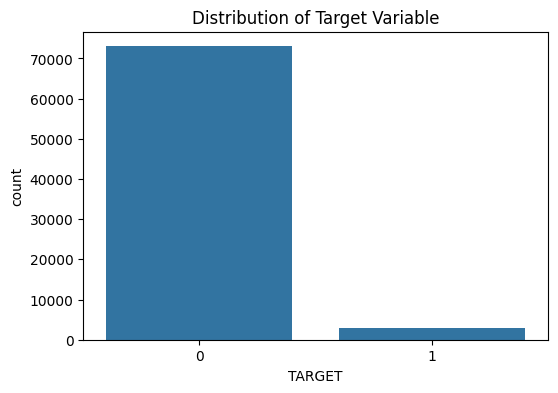

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=train)
plt.title('Distribution of Target Variable')
plt.show()

## Feature Correlation Analysis
Examining the correlation between features and the target variable helps identify features that may contribute more significantly to predictions. We also plot a heatmap for visual clarity.

## Identifying Low-Variance Features
Features with low variance contribute little information and can be removed to improve model efficiency. Here, we identify such features with a variance threshold of 0.01.

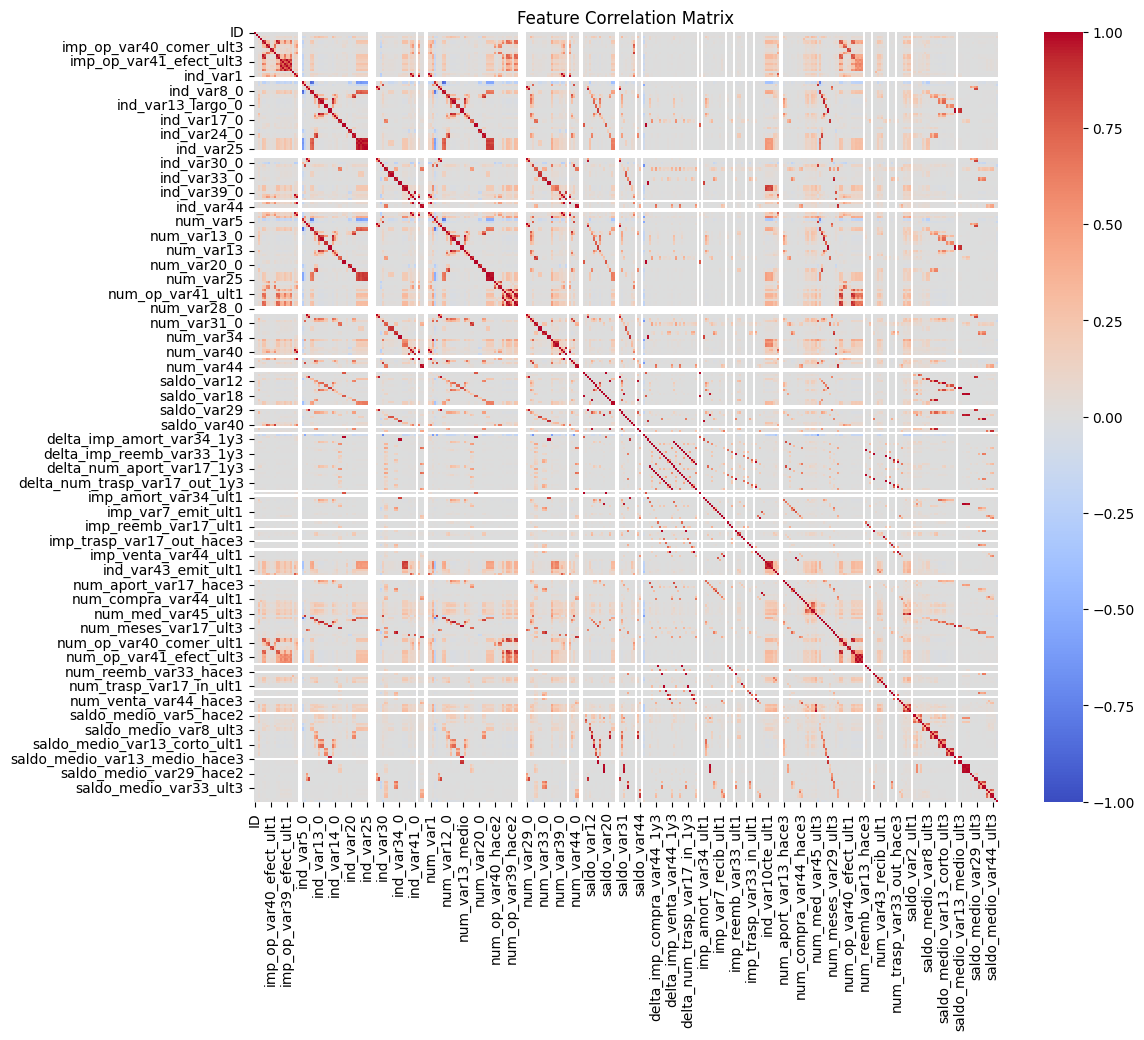

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,-0.005687,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


In [ ]:
import pandas as pd

# Identify low-variance features
# Setting a threshold to detect features that do not vary much and thus contribute little to the model
low_variance_features = [col for col in train.columns if train[col].var() < 0.01]


print("Low-variance features (variance < 0.01):")
for feature in low_variance_features:
    print(f'- {feature}')

# Compute the correlation of all features with the target variable
# This helps to identify features that have strong positive or negative correlations
correlation_with_target = train.corr()['TARGET'].sort_values(ascending=False)

# Display the top 5 most relevant features based on correlation
print("\nTop 5 most relevant features based on correlation with TARGET:")
print(correlation_with_target.head(5))

# Display the 5 least correlated features
print("\nTop 5 least correlated features (potentially irrelevant):")
print(correlation_with_target.tail(5))

Low-variance features (variance < 0.01):
- ind_var1
- ind_var2_0
- ind_var2
- ind_var6_0
- ind_var6
- ind_var13_largo
- ind_var13_medio_0
- ind_var13_medio
- ind_var14
- ind_var17_0
- ind_var17
- ind_var18_0
- ind_var18
- ind_var19
- ind_var20_0
- ind_var20
- ind_var27_0
- ind_var28_0
- ind_var28
- ind_var27
- ind_var29_0
- ind_var29
- ind_var30_0
- ind_var31_0
- ind_var31
- ind_var32_cte
- ind_var32_0
- ind_var32
- ind_var33_0
- ind_var33
- ind_var34_0
- ind_var34
- ind_var40
- ind_var41
- ind_var39
- ind_var44_0
- ind_var44
- ind_var46_0
- ind_var46
- num_var6_0
- num_var6
- num_var13_medio_0
- num_var13_medio
- num_var18_0
- num_var18
- num_var27_0
- num_var28_0
- num_var28
- num_var27
- num_var29_0
- num_var29
- num_var33
- num_var34_0
- num_var34
- num_var41
- num_var46_0
- num_var46
- saldo_var28
- saldo_var27
- saldo_var41
- saldo_var46
- imp_amort_var18_hace3
- imp_amort_var34_hace3
- imp_reemb_var13_hace3
- imp_reemb_var33_hace3
- imp_trasp_var17_out_hace3
- imp_trasp_var33_ou

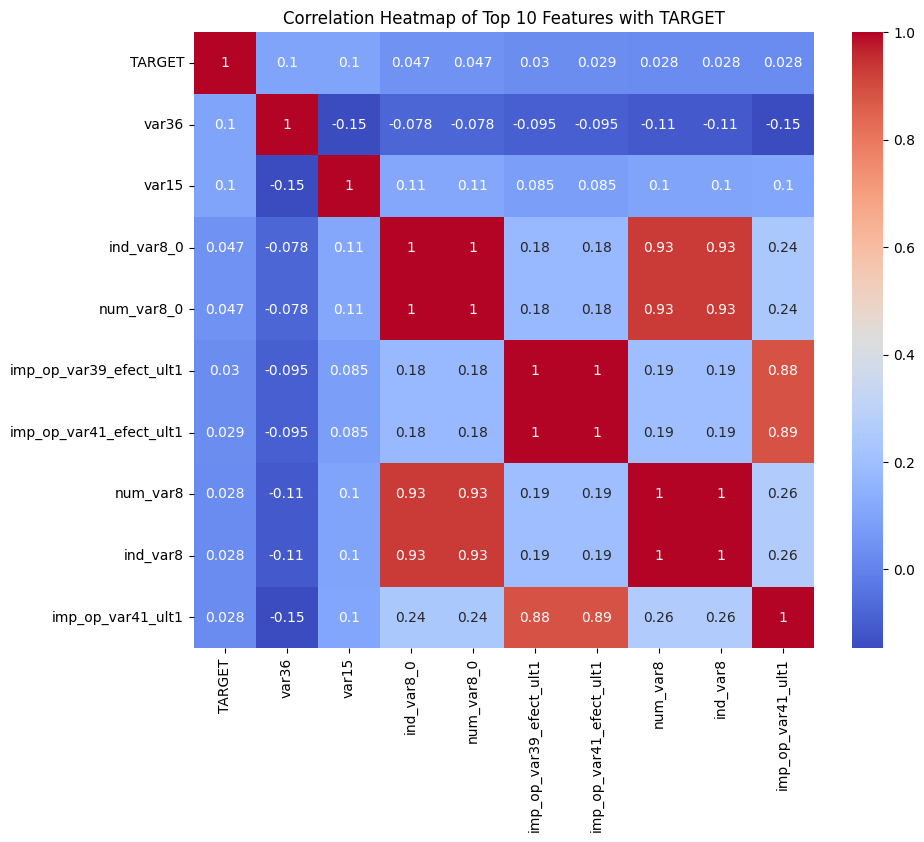

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


top_features = correlation_with_target.index[:10]
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 10 Features with TARGET')
plt.show()

## Model Building and Hyperparameter Tuning
We explore different configurations of decision trees by adjusting parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` to find the best performing model. Hyperparameter tuning is performed using `GridSearchCV` to optimize the model.

In [ ]:
from sklearn.model_selection import train_test_split


X = train.drop(columns=['TARGET'])
y = train['TARGET']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Base model
tree_base = DecisionTreeClassifier(random_state=42)
tree_base.fit(X_train, y_train)
y_pred_base = tree_base.predict_proba(X_val)[:, 1]
auc_base = roc_auc_score(y_val, y_pred_base)

# Model 1: Max depth change
tree_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_depth.fit(X_train, y_train)
y_pred_depth = tree_depth.predict_proba(X_val)[:, 1]
auc_depth = roc_auc_score(y_val, y_pred_depth)

# Model 2: Change splitting criterion
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict_proba(X_val)[:, 1]
auc_entropy = roc_auc_score(y_val, y_pred_entropy)

# Model 3: Limit leaf nodes
tree_leaf_nodes = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
tree_leaf_nodes.fit(X_train, y_train)
y_pred_leaf_nodes = tree_leaf_nodes.predict_proba(X_val)[:, 1]
auc_leaf_nodes = roc_auc_score(y_val, y_pred_leaf_nodes)

In [ ]:
results = pd.DataFrame({
    'Model': ['Base Model', 'Max Depth=5', 'Criterion=Entropy', 'Max Leaf Nodes=20'],
    'AUC Score': [auc_base, auc_depth, auc_entropy, auc_leaf_nodes]
})

print(results)

               Model  AUC Score
0         Base Model   0.553033
1        Max Depth=5   0.799910
2  Criterion=Entropy   0.555154
3  Max Leaf Nodes=20   0.796228


In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [10, 20, 50, None]
}


tree = DecisionTreeClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by grid search:")
print(grid_search.best_params_)
print(f"Best AUC score from grid search: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=10; total time=   0.7s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=10; total time=   0.7s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=10; total time=   0.7s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=10; total time=   0.8s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=10; total time=   0.7s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=20; total time=   0.8s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=20; total time=   0.9s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=20; total time=   1.0s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=20; total time=   1.2s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=20; total time=   1.2s
[CV] END .....criterion=gini, max_depth=5, max_leaf_nodes=50; total time=   1.2s
[CV] END .....criterion=gini, max_depth=5, max_

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate the base model
auc_scores = cross_val_score(tree_base, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {auc_scores}")
print(f"Mean AUC score: {auc_scores.mean():.4f}")

Cross-validated AUC scores: [0.38505741 0.56235955 0.52778052 0.55578083 0.50013697]
Mean AUC score: 0.5062


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Implement StratifiedKFold for consistent target distribution across folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use cross-validation with the best model parameters
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50, random_state=42)

# Compute cross-validated AUC scores
cv_auc_scores = cross_val_score(best_tree, X, y, cv=skf, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_auc_scores}")
print(f"Mean AUC score: {cv_auc_scores.mean():.4f}")

Cross-validated AUC scores: [0.81285608 0.81775261 0.82383768 0.80143541 0.82699032]
Mean AUC score: 0.8166


In [ ]:
# Train the best model on the full training set
best_tree.fit(X, y)

# Make predictions on the test set
test_predictions = best_tree.predict_proba(test)[:, 1]

## Model Evaluation
To assess the performance of our models, we use metrics such as AUC, precision, recall, and the confusion matrix. These metrics provide insight into the model's ability to distinguish between satisfied and unsatisfied customers.

### Key Metrics Explained:
- **AUC (Area Under the Curve)**: Measures the ability of the model to discriminate between classes.
- **Precision and Recall**: Evaluate the model's correctness and sensitivity.
- **Confusion Matrix**: Provides a detailed breakdown of true/false positives and negatives.

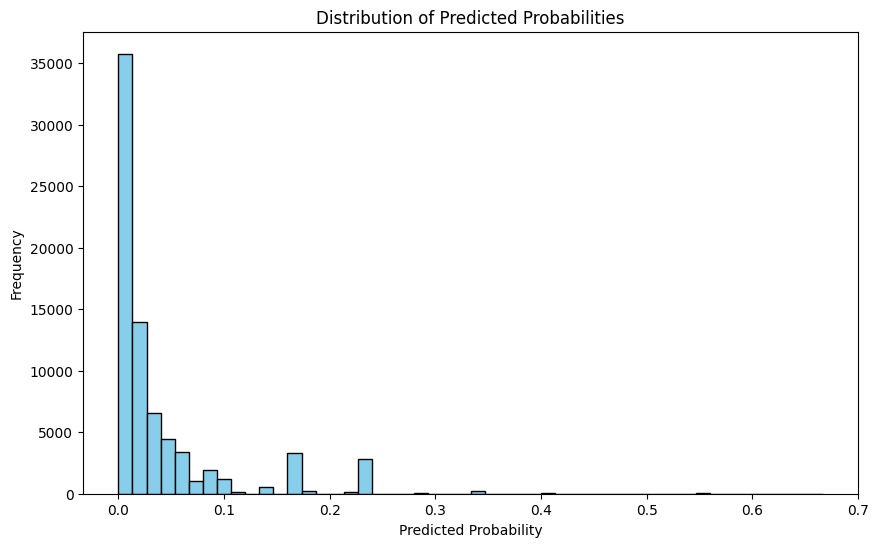

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

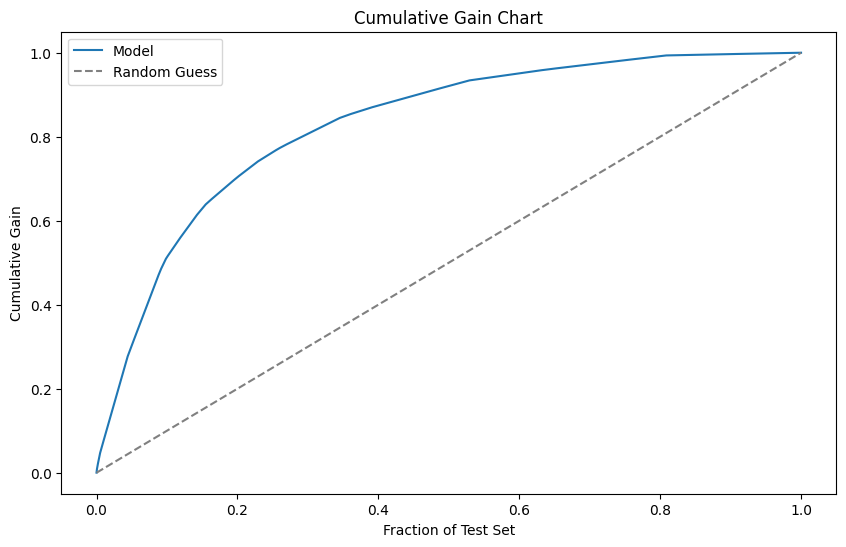

In [ ]:
import numpy as np

# Sort the predictions and calculate cumulative gains
sorted_indices = np.argsort(test_predictions)[::-1]
sorted_predictions = test_predictions[sorted_indices]

# Plot the cumulative gain chart
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1, len(sorted_predictions)), np.cumsum(sorted_predictions) / np.sum(sorted_predictions), label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.title('Cumulative Gain Chart')
plt.xlabel('Fraction of Test Set')
plt.ylabel('Cumulative Gain')
plt.legend()
plt.show()

In [ ]:
test['Predicted Probability'] = test_predictions

# Display the top 10 predictions with the highest probabilities
top_predictions = test.sort_values(by='Predicted Probability', ascending=False).head(10)
print("Top 10 predictions:")
print(top_predictions[['ID', 'Predicted Probability']])

Top 10 predictions:
           ID  Predicted Probability
22518   44970               0.666667
60883  122009               0.666667
50249  100666               0.555556
43036   85958               0.555556
58944  118125               0.555556
47237   94566               0.555556
4015     8014               0.555556
61861  123949               0.555556
58188  116631               0.555556
55341  110980               0.555556


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a decision tree model with class weights
tree_smote = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50, class_weight='balanced', random_state=42)
tree_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model on the validation set
y_pred_val_smote = tree_smote.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_val_smote)
print(f"AUC Score after applying SMOTE and class weights: {auc_score:.4f}")

AUC Score after applying SMOTE and class weights: 0.7840


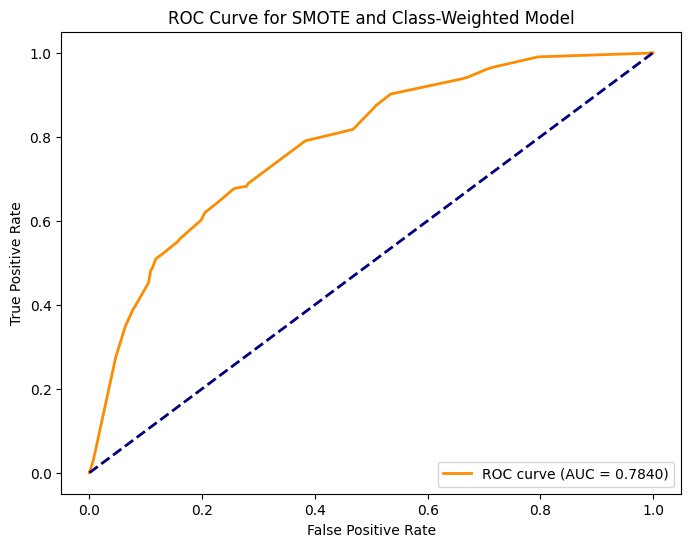

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_val_smote)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SMOTE and Class-Weighted Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes': [None, 20, 50, 100]
}


tree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)

# Perform Grid Search with cross-validation
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search_tree.fit(X_train_smote, y_train_smote)

# Display the best parameters and corresponding AUC score
print("Best parameters found by grid search:")
print(grid_search_tree.best_params_)
print(f"Best AUC score from grid search: {grid_search_tree.best_score_:.4f}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   2.7s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   1.9s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2; total time=   1.9s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   2.1s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   2.9s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   2.1s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5; total time=   2.0s
[CV] END m

## Final Model Comparison and Insights
Here, we compare the performance of different models using the chosen metrics. We analyze the trade-offs between precision and recall and explain why certain models may be more suitable for specific business goals.

### Conclusion:
- The weighted Bagging Classifier provides a balance between recall and precision, with an AUC score slightly higher than simpler models.
- Future improvements could involve more feature engineering or ensemble strategies.

In [ ]:
# Get the best estimator from grid search
best_tree_model = grid_search_tree.best_estimator_

# Predict on the validation set
y_pred_val_best_tree = best_tree_model.predict_proba(X_val)[:, 1]
auc_score_best_tree = roc_auc_score(y_val, y_pred_val_best_tree)
print(f"AUC Score of the best decision tree model: {auc_score_best_tree:.4f}")

AUC Score of the best decision tree model: 0.7317


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Initialize BaggingClassifier
bagging_tree = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion='entropy',
        max_depth=15,
        min_samples_leaf=5,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42
    ),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)


bagging_tree.fit(X_train_smote, y_train_smote)

# Predict on the validation set
y_pred_val_bagging = bagging_tree.predict_proba(X_val)[:, 1]
auc_score_bagging = roc_auc_score(y_val, y_pred_val_bagging)
print(f"AUC Score of the Bagging Classifier with Decision Trees: {auc_score_bagging:.4f}")

AUC Score of the Bagging Classifier with Decision Trees: 0.8008


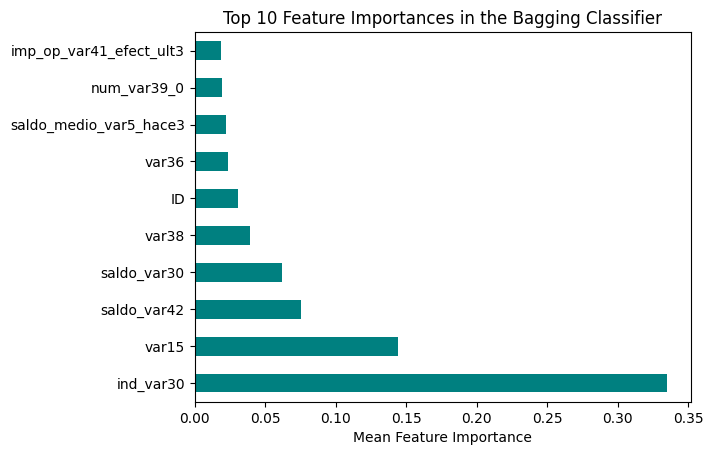

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from all estimators
importances_list = [tree.feature_importances_ for tree in bagging_tree.estimators_]


importances_df = pd.DataFrame(importances_list, columns=X.columns)

# Calculate the mean feature importance across all trees
mean_importances = importances_df.mean()

# Sort and plot the top 10 feature importances
mean_importances_sorted = mean_importances.sort_values(ascending=False)
mean_importances_sorted.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances in the Bagging Classifier')
plt.xlabel('Mean Feature Importance')
plt.show()

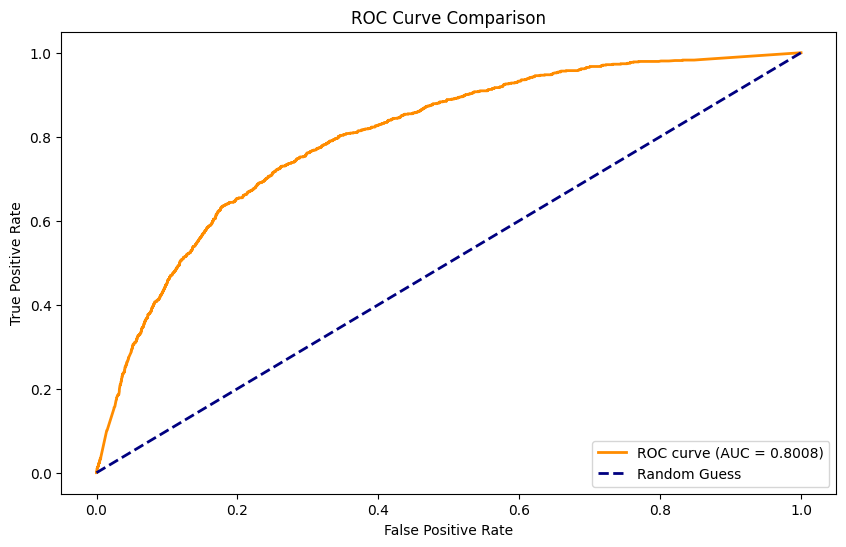

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the validation set
y_pred_prob = bagging_tree.predict_proba(X_val)[:, 1]


fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

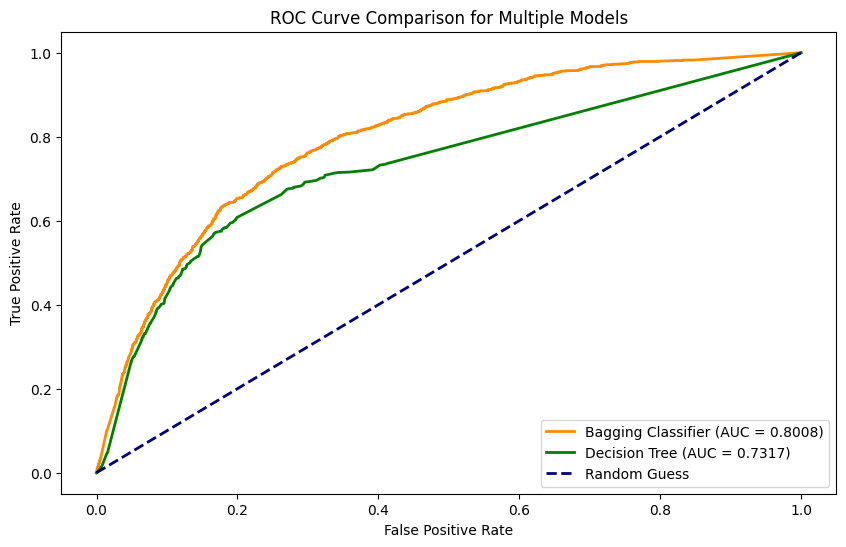

In [ ]:
# comparing Bagging Classifier and a single Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_val, y_pred_val_best_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Bagging Classifier (AUC = {roc_auc:.4f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiple Models')
plt.legend(loc="lower right")
plt.show()
fpr_tree, tpr_tree, _ = roc_curve(y_val, y_pred_val_best_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

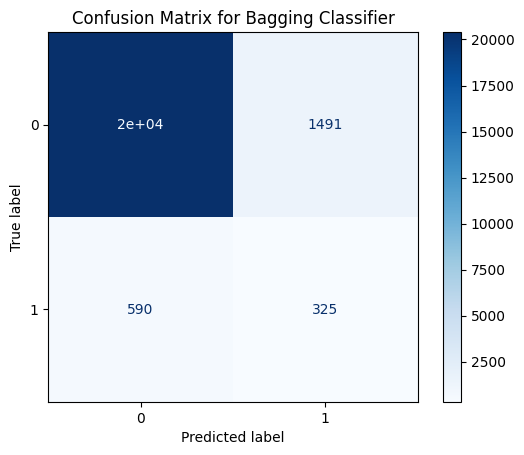

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels on the validation set (using a threshold of 0.5)
y_pred_val_labels = (y_pred_val_bagging >= 0.5).astype(int)


cm = confusion_matrix(y_val, y_pred_val_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, y_pred_val_labels)
recall = recall_score(y_val, y_pred_val_labels)
f1 = f1_score(y_val, y_pred_val_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.1790
Recall: 0.3552
F1-Score: 0.2380


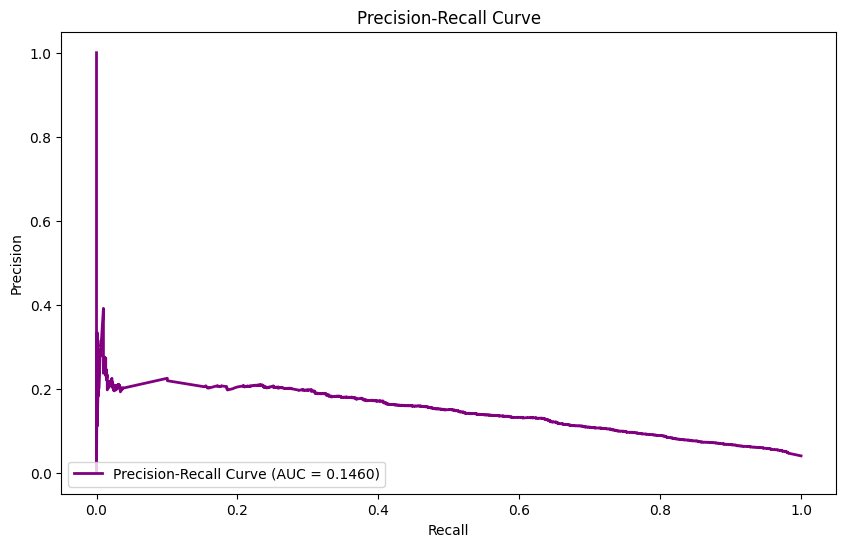

In [ ]:
from sklearn.metrics import precision_recall_curve, auc


precision, recall, thresholds = precision_recall_curve(y_val, y_pred_val_bagging)
pr_auc = auc(recall, precision)


plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

## Creating the Submission File

In [42]:
# Assuming 'bagging_tree' is your final model
# Ensure the test set has the same features as the training set
test_aligned = test[X_train.columns]

# Predict probabilities for the TARGET variable
test_predictions = bagging_tree.predict_proba(test_aligned)[:, 1]  # Get the probability of the positive class

In [43]:
# Ensure the test set has an 'ID' column
submission = pd.DataFrame({
    'ID': test['ID'],  # Replace 'ID' with the actual column name in your test set if different
    'TARGET': test_predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' has been created.")

Submission file 'submission.csv' has been created.
